In [35]:
import matplotlib.pyplot as plt
import torch

dev=torch.device("cuda:0")
x = torch.arange(9).reshape([3,3])
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [36]:
device = torch.device('cuda')

In [37]:
x.size()

torch.Size([3, 3])

In [38]:
image_path=".\pic\lenna.png"
pic=plt.imread(image_path)
pic=torch.from_numpy(pic)
pic

tensor([[[0.8784, 0.5373, 0.5020],
         [0.8863, 0.5333, 0.4863],
         [0.8902, 0.5333, 0.4824],
         ...,
         [0.7216, 0.3255, 0.3647],
         [0.9569, 0.6118, 0.5333],
         [0.9647, 0.6078, 0.4784]],

        [[0.8784, 0.5294, 0.4706],
         [0.8902, 0.5255, 0.4627],
         [0.8902, 0.5255, 0.4549],
         ...,
         [0.8196, 0.4039, 0.3922],
         [0.8078, 0.4314, 0.4039],
         [0.6039, 0.2784, 0.3412]],

        [[0.8784, 0.5137, 0.4196],
         [0.8863, 0.5098, 0.4353],
         [0.8824, 0.5137, 0.4314],
         ...,
         [0.7176, 0.3176, 0.3294],
         [0.3569, 0.0510, 0.2235],
         [0.2471, 0.0000, 0.2196]],

        ...,

        [[0.3765, 0.1216, 0.2510],
         [0.3882, 0.1294, 0.2549],
         [0.3608, 0.0863, 0.2510],
         ...,
         [0.4039, 0.1216, 0.2392],
         [0.3608, 0.0824, 0.2157],
         [0.4549, 0.1216, 0.2353]],

        [[0.3608, 0.1020, 0.2353],
         [0.3765, 0.1098, 0.2392],
         [0.

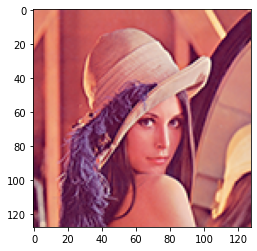

In [39]:
plt.imshow(pic)
plt.show()

In [42]:
Filter=torch.tensor([[0,1],[2,3]])
def convo(F,pic):
    h=pic.size()[0]-F.size()[0]#行数-1
    w=pic.size()[1]-F.size()[1]#列数-1
    if(len(pic.size())>2):#注意保留通道数
        res=torch.zeros(h+1,w+1,pic.size()[2])
        for k in range(pic.size()[2]):#k维
            x=pic[:,:,k]
            #从卷积核的左上角开始遍历
            for i in range(0,h+1):# 行
                for j in range(0,w+1):#列
                    res[i,j,k]=(F*x[i:i+F.size()[0],j:j+F.size()[1]]).sum()
        return res
    else:
        res=torch.zeros(h+1,w+1)

        #从卷积核的左上角开始遍历
        for i in range(0,h+1):# 行
            for j in range(0,w+1):#列
                res[i,j]=(F*pic[i:i+F.size()[0],j:j+F.size()[1]]).sum()
        return res

convo(Filter,x)
        

tensor([[19., 25.],
        [37., 43.]])

In [43]:
Filter=torch.tensor([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

pic=convo(Filter,pic)
pic.size()

torch.Size([126, 126, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


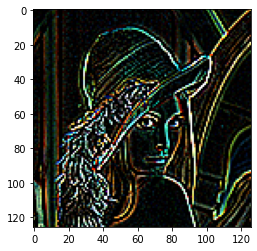

In [44]:
plt.imshow(pic)
plt.show()